# Logistic Regression

This is an example of how to solve a logistic regression problem using gradient descent.

Suppose a student wanted to determine their chances of being admitted to a college based on their math SAT and verbal SAT test scores.  This would require a method of predicting classifications of either "Admitted" or Not Admitted" based on a pair of test scores.  Using a two-feature dataset of math SAT and verbal SAT scores and the corresponding admission decision as the label, a logistic regression model is ideal for determining these classifications.

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Load data from Excel file

The dataset has three columns. Column 1 contains the math SAT scores, Column 2 contains the verbal SAT scores, and Column 3 contains the associated label (1 -> Admitted, 0 -> Not Admitted)

shape of sample data: (100, 3)


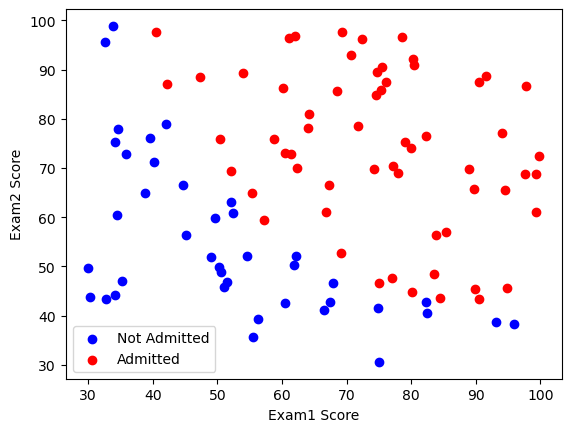

In [2]:
data_frame = pd.read_excel('logReg_data.xlsx')

# syntax notes: the outer square brackets indicate the columns (or second dimension) of the data
# Use Pandas dataframe to create Numpy array
data = data_frame[['Exam1', 'Exam2', 'Admission Decision']].to_numpy()

print('shape of sample data:', data.shape) # Check if data is 100 by 3

#Load data into X_train a numpy array of shape (100,2) and y_train of shape (100,1)
X_train = data[:, :2]                 # Get all rows and first two columns of dataset: 'Exam1', 'Exam2'
y_train = data[:, -1].reshape(-1, 1)  # Get all rows and last column of dataset: 'Admission Decision',
                                      # then reshape the row vector into a column vector
                                            # note: using -1 in reshape infers the length for that dimension
                                            # In this case, an equivalent statement would be y_train.reshape(100, 1)
# shape checks:
# print(f'X_train shape: {X_train.shape} {X_train}')
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape} {y_train}')
# print(f'y_train shape: {y_train.shape}')

x_class0 = X_train[y_train.flatten() == 0]
x_class1 = X_train[y_train.flatten() == 1]

# Create scatter plot
plt.scatter(x_class0[:, 0], x_class0[:, 1], color='blue', label='Not Admitted')
plt.scatter(x_class1[:, 0], x_class1[:, 1], color='red', label='Admitted')

# Add labels and legend
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()

# Implement the Sigmoid function

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    g = 1 / (1 + np.exp(-z))

    return g

# Implement the cost function for Logistic Regression.

Cost function for logistic regression:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

In [4]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for this assignment
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape

    # shape checks
    # print(f'y shape: {y.shape}')
    # print(f'X {X.shape}')

    # compute z for each sample
    z_wb = np.dot(X, w) + b
    # print(f'z_wb {z_wb.shape}')

    # compute sigmoid of z for each sample
    f_wb = sigmoid(z_wb)
    # print(f'f_wb shape: {f_wb.shape}')

    # # log(0) results in DivideByZero, prevent this using very small number to ensure f_wb is within (0:1)
    # small_number = 1e-15
    # f_wb = np.clip(f_wb, small_number, 1 - small_number)
    # # print(f'f_wb adjusted {f_wb.shape}: {f_wb}')

    # reshape y to prevent array mismatch and resulting explosion of cost value
    y_1D = y.reshape(-1)

    # calculate the loss function for each sample
    loss_fn = - (y_1D * np.log(f_wb) + (1 - y_1D) * np.log(1 - f_wb))
    # print(f'loss_fn shape {loss_fn.shape}')

    J_wb = total_cost = (1 / m) * np.sum(loss_fn)

    return total_cost

Test sigmoid and cost function methods

In [5]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.3])
test_b = -14.

# testing sigmoid function
# z_wb = np.dot(X_train, test_w) + test_b
# print(f'test sigmoid function\n\nz_wb: {z_wb}')

cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w =[0.2,0.3] and b = -14: {:.3f}'.format(cost))

Cost at test w =[0.2,0.3] and b = -14: 5.117


Expected result of sigmoid and cost function tests:

Cost at test w =[0.2,0.3] and b = -14: 5.117

Implement Gradient for Logistic Regression

Gradient descent algorithm:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaneously.


$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset


*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

In [6]:
def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    # dj_dw = np.zeros(w.shape)
    # dj_db = 0.

    # Shape checks
    # print(f'X shape: {X.shape}')
    # print(f'y shape: {y.shape}')
    # print(f'w shape: {w.shape}')

    # ensure that y is 1 dimensional
    y_1D = y.reshape(-1)

    z_wb = np.dot(X, w) + b
    # print(f'z_wb shape: {z_wb.shape}')
    f_wb = sigmoid(z_wb)  # the model's prediction
    # print(f'f_wb shape: {f_wb.shape}')

    # create vector for the error between the model predictions and ground truth labels
    error_vector = f_wb - y_1D
    # print(f'error_vector shape: {error_vector.shape}')

    # calculate dJ/db using numpy element-wise computation
    dj_db = (1 / m) * (np.sum(error_vector))

    """ calculate dJ/dw using vector operations """
    dj_dw = (1 / m) * np.dot(X.T, error_vector)



    return dj_db, dj_dw

Test compute_gradient function

In [7]:
# testing compute_gradient()
# np.random.seed(1)
# initial_w = 0.01 * (np.random.rand(2) - 0.5)
# initial_b = -8
#
# b_grad, w_grad = compute_gradient(X_train, y_train, initial_w, initial_b)
# print(f'b_grad: {b_grad}')
# print(f'w_grad {w_grad.shape}:')
# print(f'w_grad {w_grad.shape}: {w_grad}')

# Implement Gradient Descent Function

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

## Run Gradient Descent Algorithm


In [9]:
#No additional code needed. Just run this cell
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


## Plot the Decision Boundary

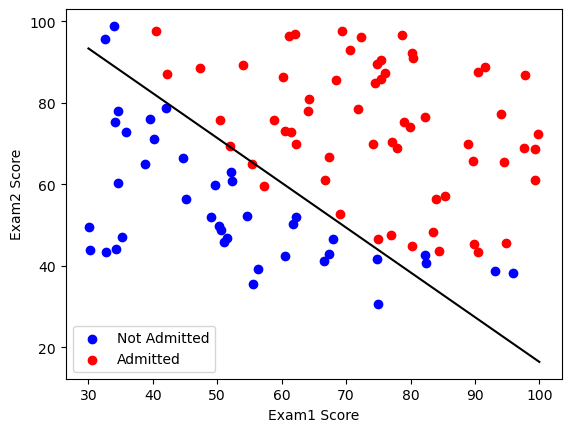

In [10]:
# Create a scatter plot
plt.scatter(x_class0[:, 0], x_class0[:, 1], color='blue', label='Not Admitted')
plt.scatter(x_class1[:, 0], x_class1[:, 1], color='red', label='Admitted')

#Plot decision boundary
x1 = [30,40,50,60,70,80,90,100]
x2=-b/w[1]+np.dot (-w[0]/w[1],x1)

plt.plot(x1, x2, color='black')

# Add labels and legend
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()
plt.show()

Use the learned logistic regression model to determine if a student with scores (70,50) is likely to be admitted and if a student with scores (60,58) is likely to be admitted.

In [11]:
X0 = 70
X1 = 50

if (w[0] * X0 + w[1] * X1 + b) > 0:
    print('Student with score (70,50) Likely to Get Admitted')
else:
    print('Student with score (70,50) Not Likely to Get Admitted')

X0 = 60
X1 = 58

if (b + w[0] * X0 + w[1] * X1) > 0:
    print('Student with score (60,58) Likely to Get Admitted')
else:
    print('Student with score (60,58) Not Likely to Get Admitted')

Student with score (70,50) Likely to Get Admitted
Student with score (60,58) Not Likely to Get Admitted


## Determine Classification Predictions Based on Learned Logistic Regression Model

In [12]:
# Create an empty array y_pred to store the predicted classifications
# y_pred = np.zeros(100)

# Iterate through each row of X to calculate predictions
# for i in range(100):
#   # Calculate the linear combination of features and bias
#   z = w[0] * X_train[i, 0] + w[1] * X_train[i, 1] + b
#
#   # Apply the sigmoid function to get the predicted probability
#   probability = 1 / (1 + np.exp(-z))
#
#   # Classify as 1 if probability is above 0.5, otherwise as 0
#   y_pred[i] = 1 if probability > 0.5 else 0

""" numpy operation implementation: eliminates for loop above """
z = w[0] * X_train[:, 0] + w[1] * X_train[:, 1] + b
prob = sigmoid(z)
y_pred = np.where(prob > 0.5, 1.0, 0.0).reshape(-1, 1)

# print(f'prob {prob.shape}: {prob}')

# Now, the array y_pred contains the predicted classifications for each sample
# print(f'y_pred {y_pred.shape}: {y_pred}')
# print(f'y_pred {y_pred.shape}')
# print(f'y_train {y_train.shape}: {y_train}')
# print(f'y_train {y_train.shape}')



# Evaluate Model

In [13]:
# Calculate TP, FP, TN, FN, Accuracy, Precision, Recall, and F-1 score
# We assume that label y = 1 is positive, and y = 0 is negative
def calc_metrics(Y_actual, Y_pred):
    """
    Calculate metrics

    Args:
    Y_actual -- test label
    Y_pred_sigmoid -- predictions on test data

    Return:
    metrics -- a dict object
    """
    #Calculate Y_pred = 1 or 0 depending on Y_pred_Sigmoid >0 or <=0 respectively

    assert(Y_actual.shape == Y_pred.shape)

    """
        TP: y_pred = 1, y = 1
        FP: y_pred = 1, y = 0
        TN: y_pred = 0, y = 0
        FN: y_pred = 0, y = 1
    """
    # true positive: predicted positive when actually positive
    TP = np.sum(np.where((Y_pred == 1) & (Y_actual == 1), 1, 0))
    # false positive: predicted positive when actually negative
    FP = np.sum(np.where((Y_pred == 1) & (Y_actual == 0), 1, 0))
    # true negative: predicted negative when actually negative
    TN = np.sum(np.where((Y_pred == 0) & (Y_actual == 0), 1, 0))
    # false negative: predicted negative when actually positive
    FN = np.sum(np.where((Y_pred == 0) & (Y_actual == 1), 1, 0))


    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = 2 * ((Precision * Recall) / (Precision + Recall))

    metrics = {
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1': F1
    }

    return metrics

model_performance = calc_metrics(y_train, y_pred)
print('TP = {}, FP = {}, TN = {}, FN = {}, \nAccuracy = {}, Precision = {}, Recall = {}, F1 = {}'.format(
    model_performance['TP'], model_performance['FP'], model_performance['TN'], model_performance['FN'], model_performance['Accuracy'], model_performance['Precision'], model_performance['Recall'], model_performance['F1']
))

TP = 58, FP = 6, TN = 34, FN = 2, 
Accuracy = 0.92, Precision = 0.90625, Recall = 0.9666666666666667, F1 = 0.9354838709677419
